In [1]:
                                                # ASSIGNMENT -- 1
                                                


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split



data = pd.read_csv(r"R:\3-1\CS F320\3D_spatial_network.csv")

w = np.random.randint(1,100,size=(3,1))*0.01


learn_rate =0.000001*3


In [3]:

y = np.array(data.iloc[:,2:3].values)
x = np.array(data.iloc[:,0:2].values)


In [4]:


def normalise():
    
    global x,y
    
    x1_mean = x[:,0].mean()
    x1_std = x[:,0].std()
    

    x2_mean = x[:,1].mean()
    x2_std = x[:,1].std()


    
    x[:,0] = (x[:,0] - x1_mean) / x1_std
    x[:,1] = (x[:,1] - x2_mean)/x2_std

    
normalise();

x = np.insert(x,0,1,axis=1)


In [5]:
# Dividing data to training and testing

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [6]:
def error_cal(w,x,y):
    error =0
    p = x.dot(w)
    error = 0.5*np.square(y-p).sum()
    return error
    

In [7]:
def error_r(w,x,y,Lambda,s):
    
    p = x.dot(w)    
    
    
    error = 0.5*np.square(p-y).sum()

    
    if(s == 'l1'):
        error +=Lambda*np.abs(w).sum()
        return error
    
    if(s =='l2'):
        error +=Lambda*np.square(w).sum()
        return error
    
  
    

In [8]:
#  Calculates the R2


def R_squared(w,x,y):
    
    y_bar = np.mean(y)
    
    
    ss_total = np.square(y-y_bar).sum()
   
    p = x.dot(w)
    
    ss_reg = np.square(p-y).sum()
    
    
        
    R_2 = 1-(ss_reg/ss_total)
    
    return R_2

In [9]:
# Linear Regression Function

def linear_regress(w,x,y,Lambda,s,plot):
    
    N = y.size
    
    loss = np.zeros(50)
    a=0
    
     
    
    for i in tqdm_notebook(range(1000)):
            
            error = error_r(w,xTrain,yTrain,Lambda,s)
            
            if(i%20 == 0):
            
                loss[a]=error/N
                
                a=a+1
            
            w = update_r(w,xTrain,yTrain,Lambda,s)
     
    if(plot =='on'):
        
        plt.plot([i*20 for i in range(50)],loss)

        plt.xlabel("Number of Interatons")

        plt.ylabel("Loss")

        plt.title("Gradient Descend")

        plt.show()
            
    return w
     


In [10]:
def stochastic(w,x,y):
    N = y.size
    
    loss = np.zeros(10)
    
    for j in tqdm_notebook(range(10)):
        
        for i in range(N):

            x_i = np.copy(x[i])

            x_i.shape = (1,3)

            w = update(w,x_i,y[i])
            
        loss[j]  = error_r(w,x,y,0,'l2')/N

        
    error = error_r(w,x,y,0,'l2')
    
    plt.plot([i for i in range(10)],loss)
    
    plt.xlabel("Number of Interatons")
    
    plt.ylabel("Loss")
    
    plt.title("Stochastic Gradient Descent")
    
    plt.show()
            
    
    print('Model:\n',w,'\nsum of squares:',error,'\nMean squared error:',error/N)
    
    return w

In [11]:
def update(w,x,y):
    
    error_w = np.zeros((3,1))
    
    p = x.dot(w)

    error_w = (p-y)*np.transpose(x)
   
    w -= learn_rate*error_w
    
    return w

In [12]:
def update_r(w,x,y,Lambda,s):
    p = x.dot(w)
    
    w_df = np.copy(w)
    
    error_w = np.matmul(np.transpose(x),(p - y))
    
    
    if(s == 'l1'):
        w_df[w_df<0]=-1
        w_df[w_df>0]=1
        

        error_w += Lambda*w_df
        
    
    
    if(s=='l2'):
        error_w +=  2*Lambda*w
   
    w -= learn_rate*error_w
    
    return w
    
    
    

In [13]:


def test(w,xTest,yTest,Lambda,s):
        
        n = yTest.size
        
        R2 = R_squared(w,xTest,yTest)
        
        RMSE = np.sqrt(2*error_r(w,xTest,yTest,Lambda,s)/n)
        

        return RMSE,R2
    
    
    

In [14]:
# solving using normal equations

def normal_eq(x,y):
    
    w = np.zeros((3,1))
    
    x_t = np.transpose(x)
    
    x_bar = np.matmul(x_t,x)
    
    x_inv = inv(x_bar)
    
    k = np.matmul(x_t,y)
    
    w = np.matmul(x_inv,k)
    
    return w
    
    
    
    

In [15]:
def binarySearchLambda(xTrain,yTrain,xTest,yTest,s):
    l=0
    r=1000
    count =0
    RMSE = np.array([])
    Lambda = np.array([])

    w = np.random.randint(1,100,size=(3,1))*0.01

    while(l<=r):

        mid = (l + r)/2

        print(mid)

        Lambda = np.append(Lambda,mid)

        w_final = linear_regress(w,xTrain,yTrain,mid,s,'off')

        rmse_mid,r2_mid = test(w_final,xTest,yTest,mid,s)

        RMSE = np.append(RMSE,rmse_mid)

        count= count +1
        
        c = 0.01*mid

    #     RMSE FOR RIGHT HALF

        w_final = linear_regress(w,xTrain,yTrain,mid+c,s,'off')

        rmse_r,r2_r =  test(w_final,xTest,yTest,mid+c,s)


    # RMSE FOR LEFT HALF

        w_final = linear_regress(w,xTrain,yTrain,mid-c,s,'off')

        rmse_l,r2_l =  test(w_final,xTest,yTest,mid-c,s)    


        if(rmse_r < rmse_mid):
            l = mid



        if(rmse_l < rmse_mid):

            r = mid

            
        if(rmse_mid < rmse_l and rmse_mid < rmse_r):
            break

        if(count==10):
            break
            
            
    plt.plot(Lambda,RMSE)
    plt.ylabel('RMSE')
    plt.xlabel('Lambda')
    plt.title('L1 Normalisation')
    plt.show() 
        

Part-A 
Gradient Descent:


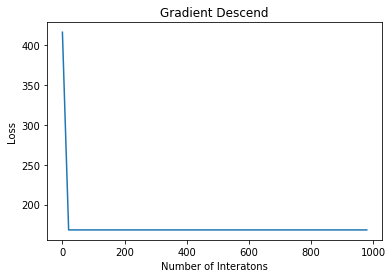

Model:
 [[22.17800962]
 [ 2.79440781]
 [-3.5682518 ]]

On the Test Data

 RMSE:  18.46987496271496 
 R2:  0.025401222950555913


In [16]:

# Part A _ Gradient descent 

'''
The fiunction linear_regression takes inputs w,x data, y data, Lambda,type of normalisation, plot graph on/off
'''

w = np.random.randint(1,100,size=(3,1))*0.01

print("Part-A \nGradient Descent:")

w_final = linear_regress(w,xTrain,yTrain,0,'l2','on')

print("Model:\n",w_final)

rmse,r2 = test(w_final,xTest,yTest,0,'l2')

print('\nOn the Test Data\n\n RMSE: ',rmse,'\n R2: ',r2)



    

Part-B
Stochastic Gradient Descent


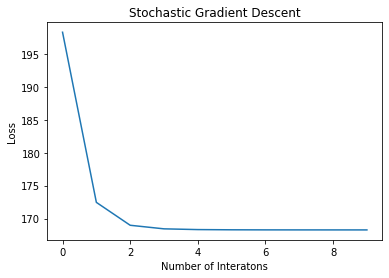

Model:
 [[22.17051443]
 [ 2.76072383]
 [-3.53727034]] 
sum of squares: 58541204.64732966 
Mean squared error: 168.27117329599383

On the Test Data

 RMSE:  18.46987815192398 
 R2:  0.0254008863809273


In [17]:
# Part B Stochastic Gradient Descend

print('Part-B\nStochastic Gradient Descent')

w = np.random.randint(1,100,size=(3,1))*0.01

w_final = np.zeros((3,1))

w_final = stochastic(w,xTrain,yTrain)

rmse,r2 = test(w_final,xTest,yTest,0,'l2')

print('\nOn the Test Data\n\n RMSE: ',rmse,'\n R2: ',r2)


In [18]:
# Part C L1 and L2 Normalisation

binarySearchLambda(xTrain,yTrain,xTest,yTest,'l2') 


# After the binary search Lambda values for l1 and l2 were close to zero. Regularisation had no effect



500.0



250.0


KeyboardInterrupt: 

In [ ]:
# Part D Using normal equations 

print("Part-D\nNormal Equations:")

w_final = normal_eq(xTrain,yTrain)

print("Model:\n",w_final)

rmse,r2 = test(w_final,xTest,yTest,0,'l2')

print('\nOn the Test Data\n\n RMSE: ',rmse,'\n R2: ',r2)

